<a href="https://colab.research.google.com/github/rama96/pytorch_tutorials/blob/master/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to PytTorch

## Tensors

In [1]:
import torch
import numpy as np

### Conversion from numpy

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array([[1, 2],[3, 4]])
x_np = torch.tensor(np_array)

### Majorly used torch functions for tensor manipulations 

1. torch.rand 
2. torch.ones 
3. torch.zeros 
4. torch.cat


In [3]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"Concatenated tensors")
print(tensor)
print(t1)
print(t1.shape)

Random Tensor: 
 tensor([[0.3460, 0.8102, 0.3522],
        [0.3398, 0.4450, 0.5384]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Concatenated tensors
tensor([[0.7633, 0.4205, 0.5634, 0.7832],
        [0.5916, 0.1791, 0.1989, 0.1904],
        [0.5917, 0.8404, 0.6718, 0.3177]])
tensor([[0.7633, 0.4205, 0.5634, 0.7832, 0.7633, 0.4205, 0.5634, 0.7832, 0.7633,
         0.4205, 0.5634, 0.7832],
        [0.5916, 0.1791, 0.1989, 0.1904, 0.5916, 0.1791, 0.1989, 0.1904, 0.5916,
         0.1791, 0.1989, 0.1904],
        [0.5917, 0.8404, 0.6718, 0.3177, 0.5917, 0.8404, 0.6718, 0.3177, 0.5917,
         0.8404, 0.6718, 0.3177]])
torch.Size([3, 12])


By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). 

In [4]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
  


In [5]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Arithmetic Operations

In [6]:
# Matrix multiplication , y1 and y2 would have the same value

tensor = torch.rand(3,4)

print(tensor)
 
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

# Checks element wise equality 
print(torch.eq(y1, y2))

# Checks overall equality
print(torch.equal(y1, y2))




tensor([[0.9541, 0.6017, 0.4506, 0.1990],
        [0.3912, 0.2967, 0.6795, 0.6451],
        [0.7735, 0.4509, 0.5796, 0.3688]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])
True


In [7]:
# This computes the element-wise product. z1, z2 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

# Checks element wise equality 
print(torch.eq(z1, z2))

# Checks overall equality
print(torch.equal(z1, z2))


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
True


## Datasets and Dataloaders


In [8]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [19]:
## Inspecting sample_idx

print("Length of training data : - " , len(training_data))

sample_idx_tensor = torch.randint(len(training_data), size=(1,))
sample_idx = sample_idx_tensor.item()

print("Sample_idx_tensor : " , sample_idx_tensor)
print("Sample_idx : " , sample_idx)

print("type of sample_idx : " , type(sample_idx) , " ||||| type of sample_idx_tensor : ", type(sample_idx_tensor))



Length of training data : -  60000
Sample_idx_tensor :  tensor([53107])
Sample_idx :  53107
type of sample_idx :  <class 'int'>  ||||| type of sample_idx_tensor :  <class 'torch.Tensor'>


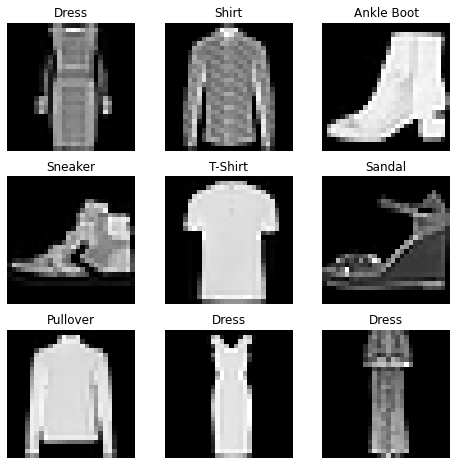

In [27]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

3 Dress


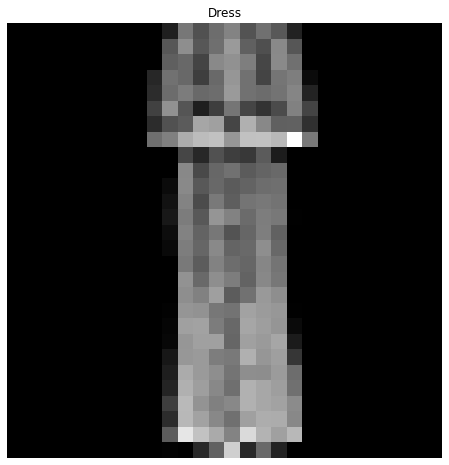

In [28]:
img, label = training_data[sample_idx]
print(label , labels_map[label])


figure = plt.figure(figsize=(8, 8))
cols, rows = 1, 1
figure.add_subplot(rows, cols, 1)
plt.title(labels_map[label])
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

In [33]:
print("Original Shape of the team : ",img.shape)

print("Squeeze Shape of the team : " , img.squeeze().shape)
## Reduces the size of the image from (1,28,28) to (28,28)


Original Shape of the team :  torch.Size([1, 28, 28])
Squeeze Shape of the team :  torch.Size([28, 28])


In [34]:
## Creating a custom dataset for your files

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label